# Mini Project 3
# Customer Review Analysis & Classification


# Problem Statement 

Business requirement to extract text from the customer reviews and provide valuable insights that can help better the product quality, customer service and also in decision making.

Identity and classify positive and negative feedbacks so that they can take actions and respond to their customers appropriately. Helps to retain customers and increase in revenue.


# About Dataset
### Context
This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

### Contents
Reviews.csv: Pulled from the corresponding SQLite table named Reviews in database.sqlite
database.sqlite: Contains the table 'Reviews'

### Data includes:

Reviews from Oct 1999 - Oct 2012
568,454 reviews
256,059 users
74,258 products
260 users with > 50 reviews

### Columns
ID: Row Id

ProductId: Unique identifier for the product

UserId: Unqiue identifier for the user

ProfileName: Profile name of the user

HelpfulnessNumerator: Number of users who found the review helpful

HelpfulnessDenominator: Number of users who indicated whether they found the review helpful or not

Score: Rating between 1 and 5

Time: Timestamp for the review

Summary: Brief summary of the review

Text: Text of the review

### Columns used in this Project
Score: Rating between 1 and 5

Text: Text of the review

### Reference
https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews

https://www.kaggle.com/code/selinglpek/sentiment-analysis-for-amazon-reviews

In [1]:
#! pip install wordcloud

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from sklearn.model_selection import train_test_split
import re
import spacy
from spacy import displacy
import nltk
import string
from collections import Counter
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r"C:\Users\Raveena's PC\Documents\Data_Science\DATA_Files\Amazon Food Reviews Data\reviews.csv")

In [4]:
data.shape

(568454, 10)

In [5]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [89]:
data[data.Score ==1].T

,1,12,26,50,62,73,75,99,153,164,...,568339,568344,568354,568359,568385,568402,568426,568431,568432,568433
Score,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Time,2012,2012,2012,2008,2008,2012,2010,2012,2011,2010,...,2012,2012,2010,2012,2012,2007,2012,2011,2011,2011
Text,Product arrived labeled as Jumbo Salted Peanut...,My cats have been happily eating Felidae Plati...,"The candy is just red , No flavor . Just plan...","This oatmeal is not good. Its mushy, soft, I d...",Arrived in 6 days and were so stale i could no...,Buyer Beware Please! This sweetener is not for...,No tea flavor at all. Just whole brunch of art...,I fed this to my Golden Retriever and he hated...,These singles sell for $2.50 - $3.36 at the st...,Seriously this product was as tasteless as the...,...,After the pop-top ring came off I used some of...,Outch !<br />I just received these french lady...,Went into the dumpster the very first night. M...,If you want unmarked grave dust this may be ...,"Be very careful to check out the the oz size, ...","I was disappointed in this product, as I had r...","The candy is tasty, but they totally scam you ...",Definitely not worth buying flavored water wit...,I thought this soup would be more like a chill...,I just bought this soup today at my local groc...


In [6]:
data.sample(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
155192,155193,B000GAT6NG,A3MK8B50JPHBB7,Amber Wright,1,1,5,1263168000,We use this for everything!,I buy this every two months. We have a family ...
111088,111089,B0014WYXYW,A1DFMOZ00P09TF,E. Color,0,0,5,1341964800,"Light, fizzy, not too sweet",I bought this on a whim and really liked it. I...
467348,467349,B001EO5JUC,A28AFRCC9Y88HT,ededwards,0,0,5,1306195200,Great cereal at a great price,I love this cereal and it costs -- when I can ...
199793,199794,B002BG38R8,A14WADMKDN2IJ7,SP,1,1,4,1336521600,Toddler loves it,"My one year old is allergic to milk protein, s..."
198566,198567,B002G8FO64,A20I2L1TL182TL,Tim Marburger,9,9,1,1290297600,"ABSOLUTELY NOT WHAT IT SEEMS TO BE, VERY DISAP...",I love this time of the year (Autumn/Fall) and...
58094,58095,B000H221Q2,A1WG7ONHT4BO4T,W. Troutman,1,1,5,1265155200,Great product,Great product compared to others in the same c...
37107,37108,B002IVDAH4,A1IR2COT1GM7ML,Aaron,1,1,5,1324425600,Great for our cat with a sensitive stomach,"After trying numerous brands, we finally settl..."
122262,122263,B0029NV6A4,A1ZAYB88YRR93L,JeMicheSunshine,0,0,5,1341705600,"My Cats Say ""MEOW"" and So Does my Dog!","My cat children love, love, love this product!..."
166567,166568,B004MA3J8Y,A2PZPOMXEDTQUS,KL,0,0,5,1348099200,Excellent Quality Bully Sticks,"I purchased the 12"" bully sticks (7 pack) from..."
156377,156378,B0007VU160,A3ET569E8Z2K1N,"J. Porter ""Tea for Me""",2,3,1,1155340800,18 PODS For how much?,This must be a typeo or this is the most expen...


In [7]:
data.Score.unique()

array([5, 1, 4, 2, 3], dtype=int64)

In [8]:
data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [10]:
# Convert Unixtimestamp to date time, extract only years

In [11]:
data.Time = pd.to_datetime(data["Time"], unit='s')

In [12]:
data.Time = data.Time.dt.strftime('%Y')

In [13]:
data.Time = data.Time.astype("int")

In [14]:
data.Time.describe()

count    568454.000000
mean       2010.582860
std           1.531855
min        1999.000000
25%        2010.000000
50%        2011.000000
75%        2012.000000
max        2012.000000
Name: Time, dtype: float64

In [15]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [16]:
# drop columns that are not required
data = data.drop(columns = ['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Summary'])

In [17]:
data.head()

,Score,Time,Text
0,5,2011,I have bought several of the Vitality canned d...
1,1,2012,Product arrived labeled as Jumbo Salted Peanut...
2,4,2008,This is a confection that has been around a fe...
3,2,2011,If you are looking for the secret ingredient i...
4,5,2012,Great taffy at a great price. There was a wid...


In [18]:
#Data from the latest year
data1 = data[data.Time == 2012]
data1.shape

(198659, 3)

In [19]:
data1[data1.Score <=3].sample()

,Score,Time,Text
185279,3,2012,The package of quinoa arrived in great conditi...


In [20]:
# Selecting only 2000 records from the year 2012 as df
df1 = data1[:2000]

In [21]:
df1.Score.value_counts()

5    1263
4     248
1     231
3     144
2     114
Name: Score, dtype: int64

In [22]:
#Create Feedback Column from score
df1["Feedback"]=df1["Score"]

In [23]:
# Remove unwanted columns
df1 = df1.drop(columns = ["Score", "Time" ])

In [24]:
df1.head()

,Text,Feedback
1,Product arrived labeled as Jumbo Salted Peanut...,1
4,Great taffy at a great price. There was a wid...,5
5,I got a wild hair for taffy and ordered this f...,4
6,This saltwater taffy had great flavors and was...,5
7,This taffy is so good. It is very soft and ch...,5


## Final DataFrame

In [25]:
df1.head()

,Text,Feedback
1,Product arrived labeled as Jumbo Salted Peanut...,1
4,Great taffy at a great price. There was a wid...,5
5,I got a wild hair for taffy and ordered this f...,4
6,This saltwater taffy had great flavors and was...,5
7,This taffy is so good. It is very soft and ch...,5


In [26]:
df1.Feedback.value_counts()

5    1263
4     248
1     231
3     144
2     114
Name: Feedback, dtype: int64

Text(0.5, 1.0, 'Distribution of Review Scores')

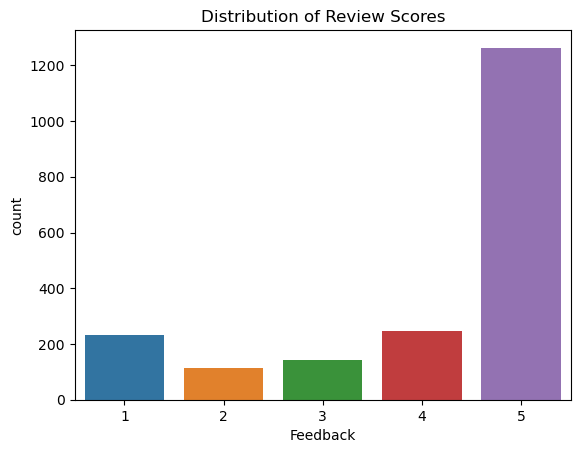

In [27]:
sns.countplot(data=df1, x="Feedback").set_title("Distribution of Review Scores")

Text(0.5, 1.0, 'Most Negative Feedbacks')

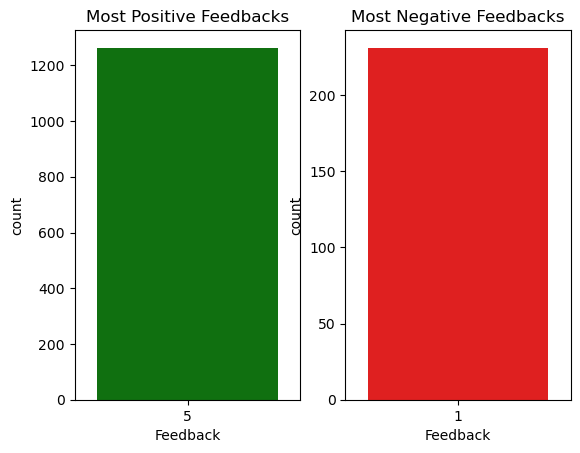

In [28]:
#Most positive & negative feedbacks
most_pos = df1[df1.Feedback == 5]
most_neg = df1[df1.Feedback == 1]
fig, ax = plt.subplots(1, 2)
sns.countplot(ax = ax[0], data=most_pos, x="Feedback", color = "green").set_title("Most Positive Feedbacks")
sns.countplot(ax = ax[1], data=most_neg, x="Feedback", color = "red").set_title("Most Negative Feedbacks")


In [29]:
a = most_pos.Text.str.cat()
b = most_neg.Text.str.cat()

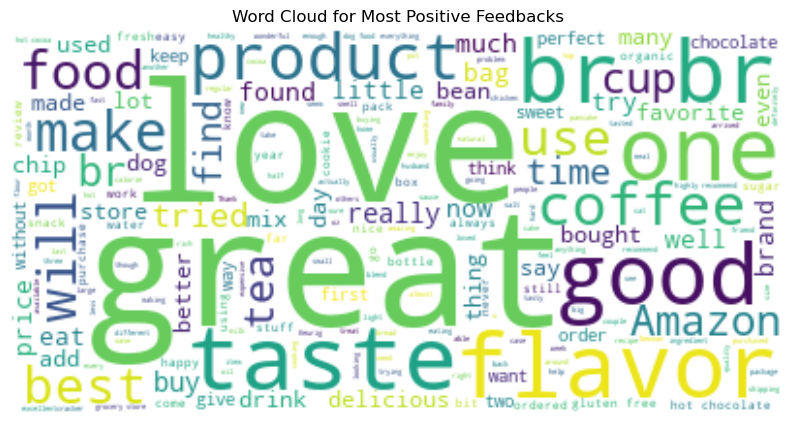

In [30]:
wordcloud_pos = WordCloud(background_color = "white").generate(a)
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud_pos, interpolation = "bilinear")
plt.title("Word Cloud for Most Positive Feedbacks")
plt.axis("off")
plt.show()

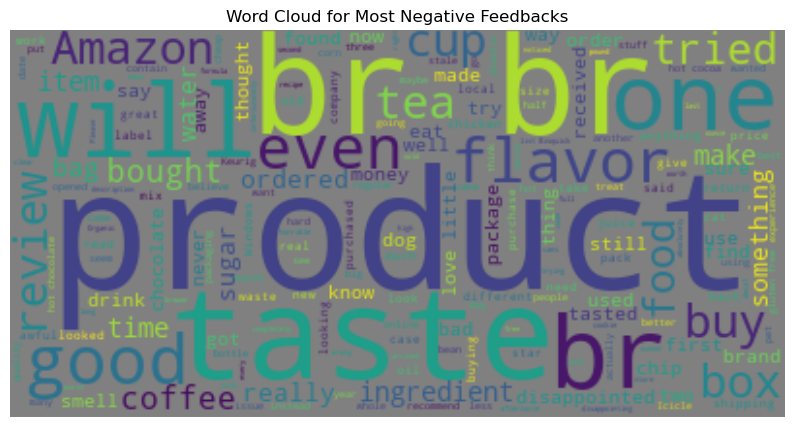

In [31]:
wordcloud_pos = WordCloud(background_color = "grey").generate(b)
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud_pos, interpolation = "bilinear")
plt.title("Word Cloud for Most Negative Feedbacks")
plt.axis("off")
plt.show()

## DataFrame with equal samples from Positive and Negative Reviews

In [32]:
df_neg = data1[data1.Score <= 3].sample(1000, random_state =10)

In [33]:
df_pos = data1[data1.Score >= 4].sample(1000, random_state =10)

In [34]:
df = pd.concat([df_neg, df_pos], ignore_index = True)

In [35]:
df = shuffle(df).reset_index(drop=True)

In [36]:
df.head(10)

,Score,Time,Text
0,4,2012,Very convenient and well-priced.<br /><br />Tw...
1,2,2012,"Because of the picture and description, I expe..."
2,5,2012,"Sorry Amazon, I am going to cover the Lindt Li..."
3,5,2012,"I just fostered a dog a few days ago, and he l..."
4,5,2012,This is exactly what I was looking for-- just ...
5,5,2012,Adds flavor to all sorts of dishes. Great for...
6,3,2012,I found the Vue system Cappuccino disappointin...
7,2,2012,Picked the Rainforest blend up at a local big ...
8,5,2012,I really like the flavor of this hot chocolate...
9,2,2012,"Gerber changed the recipe for the worse, this ..."


## Clean Text

### Using Spacy for text Processing

In [37]:
nlp = spacy.load('en_core_web_md')

#### Remove multiple spaces, newlines and double quotes

In [38]:
def clean_text(text):
    # reduce multiple spaces and newlines to only one
    text = re.sub(r'(\s\s+|\n\n+)', r'\1', text)
    text = re.sub(r"\s+", " ", text)
    # remove double quotes
    text = re.sub(r'"', '', text)
    # remove <br />
    text = re.sub(r'(<br...|<.br...)', '', text)
    # remove urls 
    text = re.sub(r'(http|https)\:\/\/[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(\/\S*)?', '', text)
    
    return text

In [39]:
df.Text = df.Text.apply(clean_text)

#### Remove Stop Words, Punctuations and Lemmatize the text

In [40]:
def convert_text(text):

    words = nlp(text)
    data_clean = [w.lemma_.lower() for w in words if (not w.is_stop and not w.is_punct and not w.like_num)] 
    text = ' '.join(data_clean)
    
    return text

In [41]:
df.Text = df.Text.apply(convert_text)

In [42]:
df.Text.iloc[10]

'month research contact score manufacturer find flavor soulistic low phosphorus content make great food cat kidney disease refuse prescription diet cat low quality ingredient find soulistic ecstatic food available cat kidney disease sad common disease add picky eater situation lower phosphorus level switch can food encourage cat drink water love fountain thirstycatfountains extend life increase quality cat devoted companion deserve good soulistic chicken pumpkin truly nutrionally complete safe high quality cat food available aware review chicken pumpkin flavor equal soulistic flavor low phosphorus good karma chicken dinner gravy try'

## Word Cloud Visuals for balanced Data Frame

In [43]:
most_pos1 = df[df.Score == 5]
most_neg1 = df[df.Score == 1]

In [44]:
a1 = most_pos1.Text.str.cat()
b1 = most_neg1.Text.str.cat()

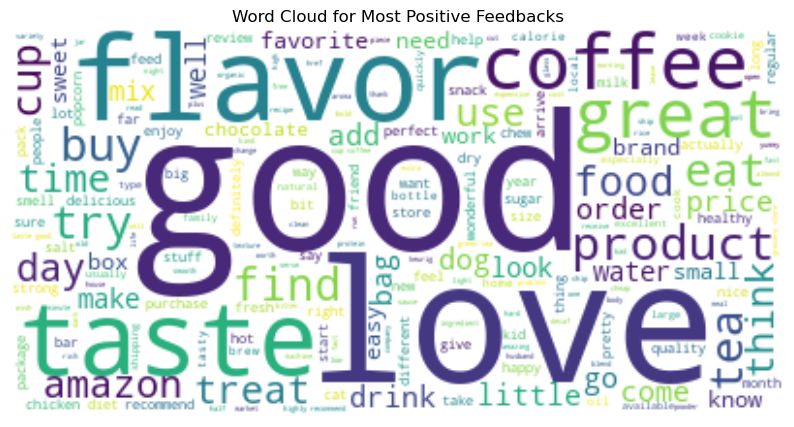

In [45]:
wordcloud_pos = WordCloud(background_color = "white").generate(a1)
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud_pos, interpolation = "bilinear")
plt.title("Word Cloud for Most Positive Feedbacks")
plt.axis("off")
plt.show()

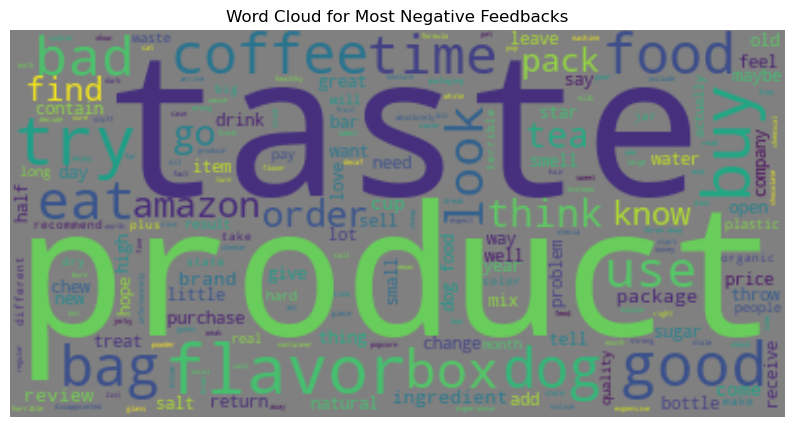

In [46]:
wordcloud_neg = WordCloud(background_color = "grey").generate(b1)
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud_neg, interpolation = "bilinear")
plt.title("Word Cloud for Most Negative Feedbacks")
plt.axis("off")
plt.show()

In [47]:
#Create Feedback Column from scores 1,2,3 as negative and 4, 5 as positive feedbacks
df["Feedback"]=df["Score"].replace({5:"positive", 4:"positive", 3:"negative", 2:"negative", 1:"negative"})

#Convert to Binary clasification
df.Feedback = df.Feedback.replace({"negative":0, "positive":1})

In [48]:
#Verify the samples ratio
(df.Feedback == 1).sum(), (df.Feedback == 0).sum()

(1000, 1000)

## Test and Train split the data

In [49]:
X = df.Text

In [50]:
y = df.Feedback

In [51]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [52]:
X_train.iloc[0]

'delicious cheese spread clean pure taste cheese spread cost love cheese love chemical additive worth extra couple dollar wonderful party gathering little instant snack freshness quality flavor wonderful far superior cheese spread'

### Using Count Vectorizer with SVC

In [53]:
# create a matrix of word counts from the text
counts = CountVectorizer()

In [54]:
# do the actual counting
A = counts.fit_transform(X_train)

In [55]:
# create a classifier using SVC
classifier = SVC(kernel='linear', probability=True)

In [56]:
# train the classifier with the training data
classifier.fit(A.toarray(), y_train)

SVC(kernel='linear', probability=True)

In [57]:
# do the transformation for the test data
# NOTE: use `transform()` instead of `fit_transform()`
B = counts.transform(X_test)

In [58]:
# make predictions based on the test data
predictions = classifier.predict(B.toarray())
predictions

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,

In [59]:
# check the accuracy
#print('Accuracy: %.4f' % accuracy_score(y_test, predictions))

In [60]:
probabilities = classifier.predict_proba(B.toarray())


In [61]:
# helper function to show results and charts
def show_summary_report(actual, prediction, probabilities):

    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, probabilities)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, probabilities)
    average_precision = average_precision_score(actual, probabilities)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, probabilities)
    roc_auc = auc(fpr, tpr)


    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)

Results : Count Vectorizer with SVC
Hamming Loss Score:  0.27
Accuracy : 0.7300 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7368 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7071 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8091                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


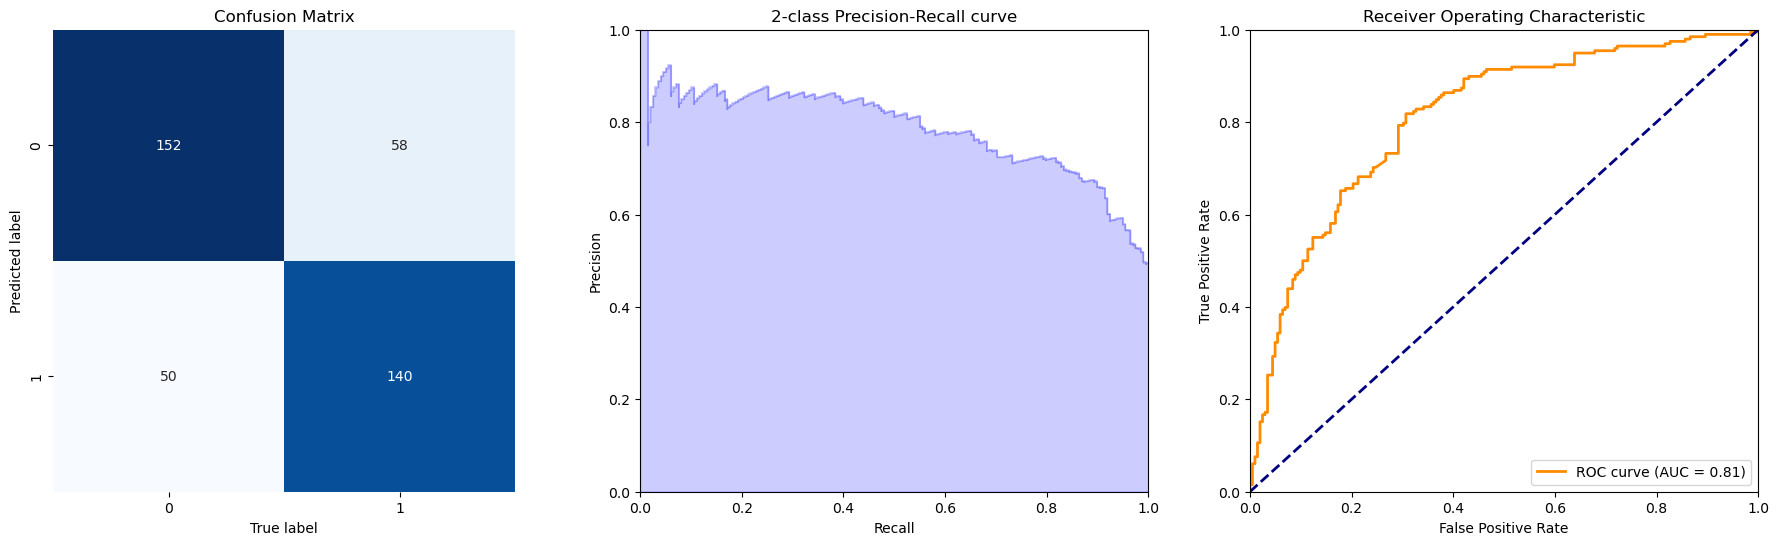

In [62]:
print("Results : Count Vectorizer with SVC")
hamming_loss = metrics.hamming_loss(y_test, predictions)
print("Hamming Loss Score: ",hamming_loss)
accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test, predictions, probabilities[:, 1:])

### Count Vectorizer with Logistic Regression

In [63]:
clf_lg = LogisticRegression()
clf_lg.fit(A.toarray(), y_train)

LogisticRegression()

In [64]:
predict_lg = clf_lg.predict(B.toarray())

In [65]:
probabilities_lg = clf_lg.predict_proba(B.toarray())


Results : Count Vectorizer with Logistic Regression
Hamming Loss Score:  0.2325
Accuracy : 0.7675 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7807 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7374 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8370                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


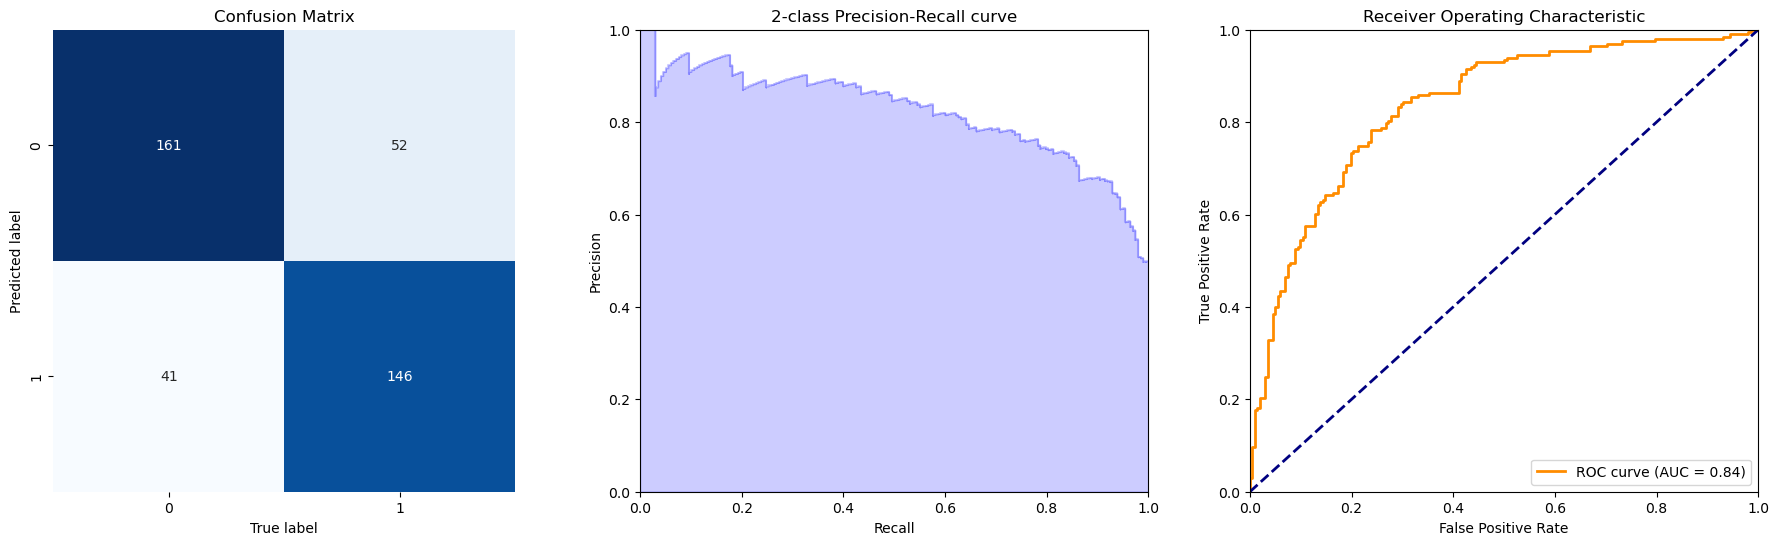

In [66]:
print("Results : Count Vectorizer with Logistic Regression")
hamming_loss = metrics.hamming_loss(y_test, predict_lg)
print("Hamming Loss Score: ",hamming_loss)
accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test, predict_lg, probabilities_lg[:, 1:])

### Count Vectorizer with Random Forest

In [67]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(A.toarray(), y_train)

RandomForestClassifier()

In [68]:
predict_rf= rf.predict(B.toarray())
probabilities_rf = rf.predict_proba(B.toarray())

Results : Count Vectorizer with Random Forest
Hamming Loss Score:  0.2075
Accuracy : 0.7925 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7889 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7929 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8715                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


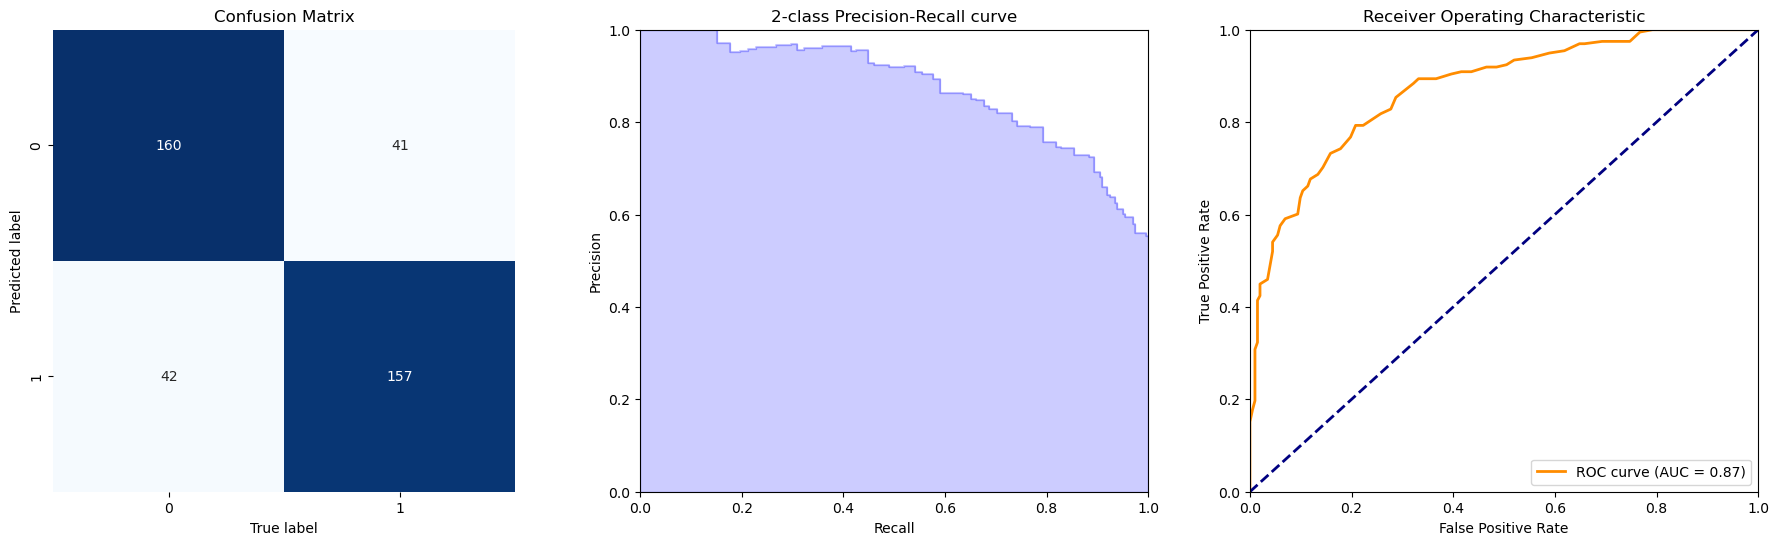

In [69]:
print("Results : Count Vectorizer with Random Forest")
hamming_loss = metrics.hamming_loss(y_test, predict_rf)
print("Hamming Loss Score: ",hamming_loss)
accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test, predict_rf, probabilities_rf[:, 1:])

### Count Vectorizer with GradientBoostingClassifier

In [70]:
gb = GradientBoostingClassifier(n_estimators=200)
gb.fit(A.toarray(), y_train)

GradientBoostingClassifier(n_estimators=200)

In [71]:
predict_gb= gb.predict(B.toarray())
probabilities_gb =gb.predict_proba(B.toarray())

Results : Count Vectorizer with GradientBoostingClassifier
Hamming Loss Score:  0.2525
Accuracy : 0.7475 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7487 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7374 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8401                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


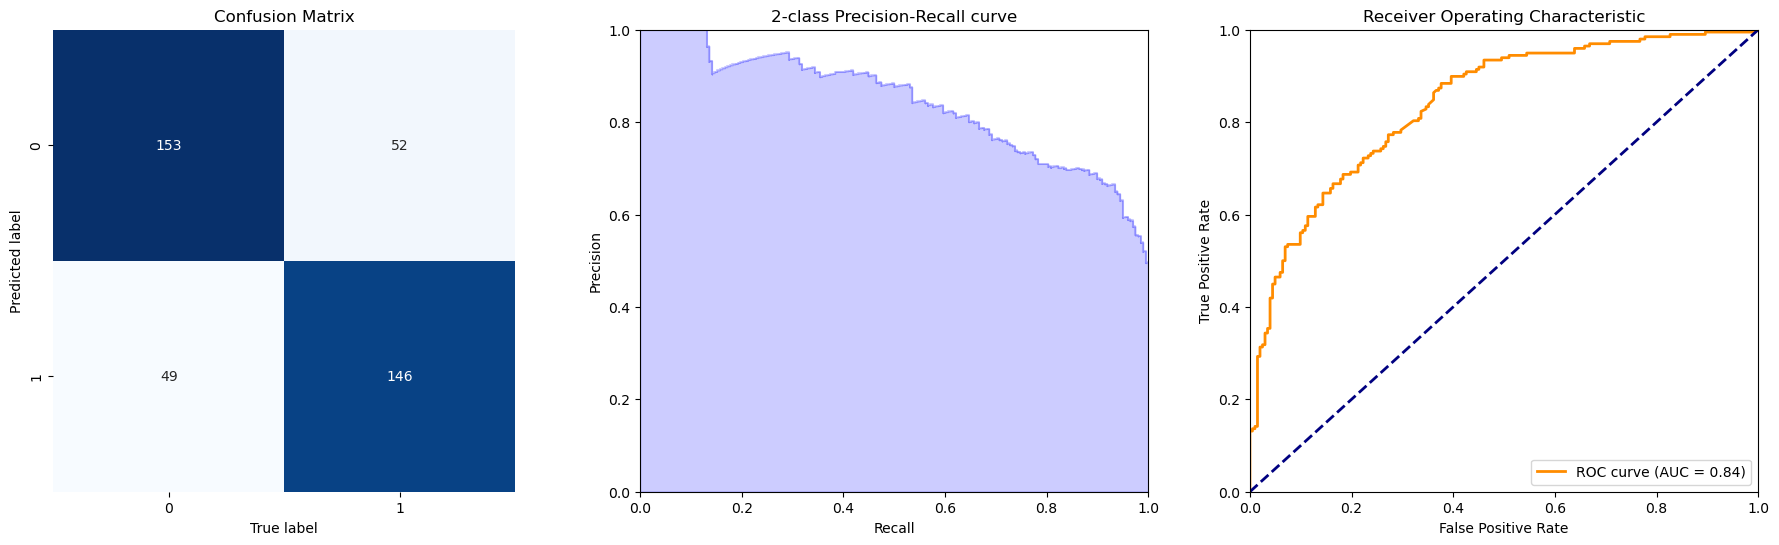

In [72]:
print("Results : Count Vectorizer with GradientBoostingClassifier")
hamming_loss = metrics.hamming_loss(y_test, predict_gb)
print("Hamming Loss Score: ",hamming_loss)
accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test, predict_gb, probabilities_gb[:, 1:])

### TF-IDF Vectorizer with SVC

In [73]:
# create a matrix of word counts from the text
# use TF-IDF
tfidf = TfidfVectorizer()
# do the actual counting
A1 = tfidf.fit_transform(X_train)

# create a classifier using SVC
classifier1 = SVC(kernel='linear', probability=True)

# train the classifier with the training data
classifier1.fit(A1.toarray(), y_train)

#transformation for the test data
B1 = tfidf.transform(X_test)

In [74]:
predict1= classifier1.predict(B1.toarray())

In [75]:
probabilities1 = classifier1.predict_proba(B1.toarray())

Results : TF-IDF Vectorizer with SVC
Hamming Loss Score:  0.2225
Accuracy : 0.7775 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7978 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7374 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8590                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


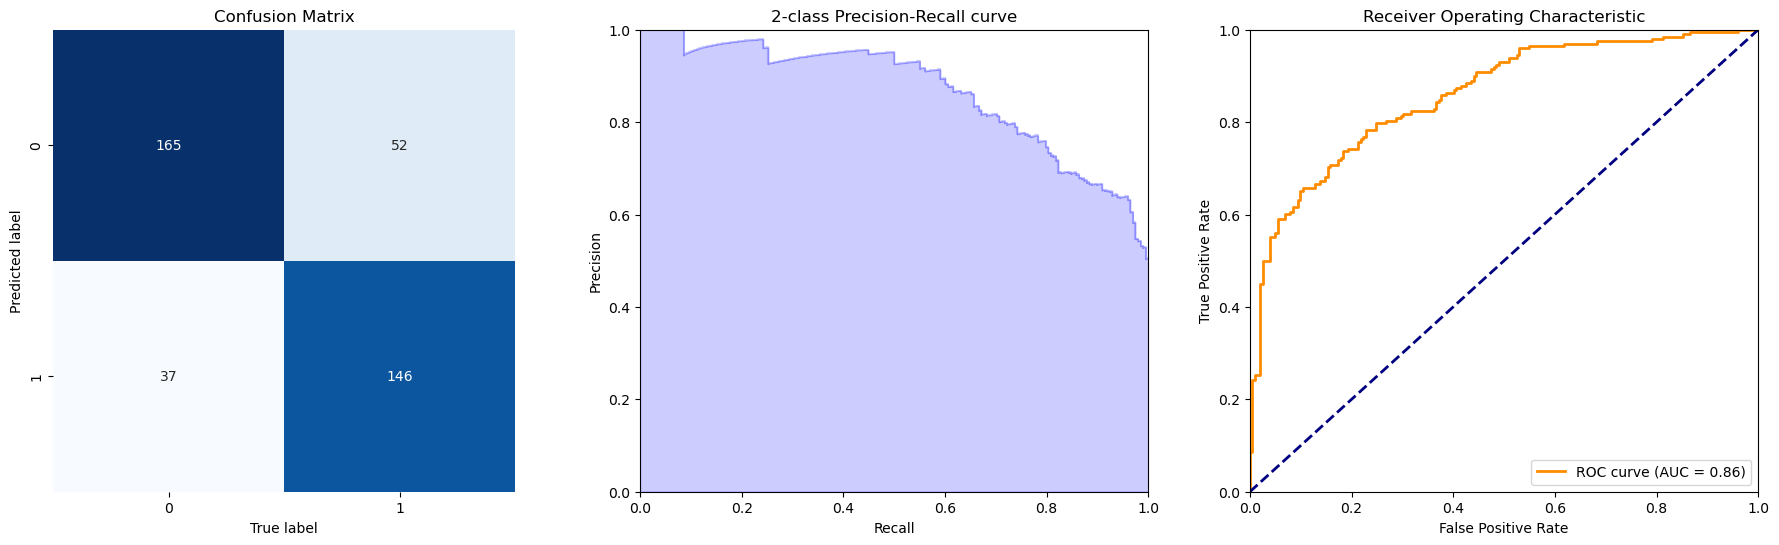

In [76]:
print("Results : TF-IDF Vectorizer with SVC")
hamming_loss = metrics.hamming_loss(y_test, predict1)
print("Hamming Loss Score: ",hamming_loss)
accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test, predict1, probabilities1[:, 1:])

### TF-IDF Vectorizer with Logistic Regression

In [77]:
clf_lg1 = LogisticRegression()
clf_lg1.fit(A1.toarray(), y_train)

LogisticRegression()

In [78]:
predict_lg1= clf_lg1.predict(B1.toarray())

In [79]:
probabilities_lg1 = clf_lg1.predict_proba(B1.toarray())

Results : TF-IDF Vectorizer with Logistic Regression
Hamming Loss Score:  0.2325
Accuracy : 0.7675 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7869 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7273 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8669                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


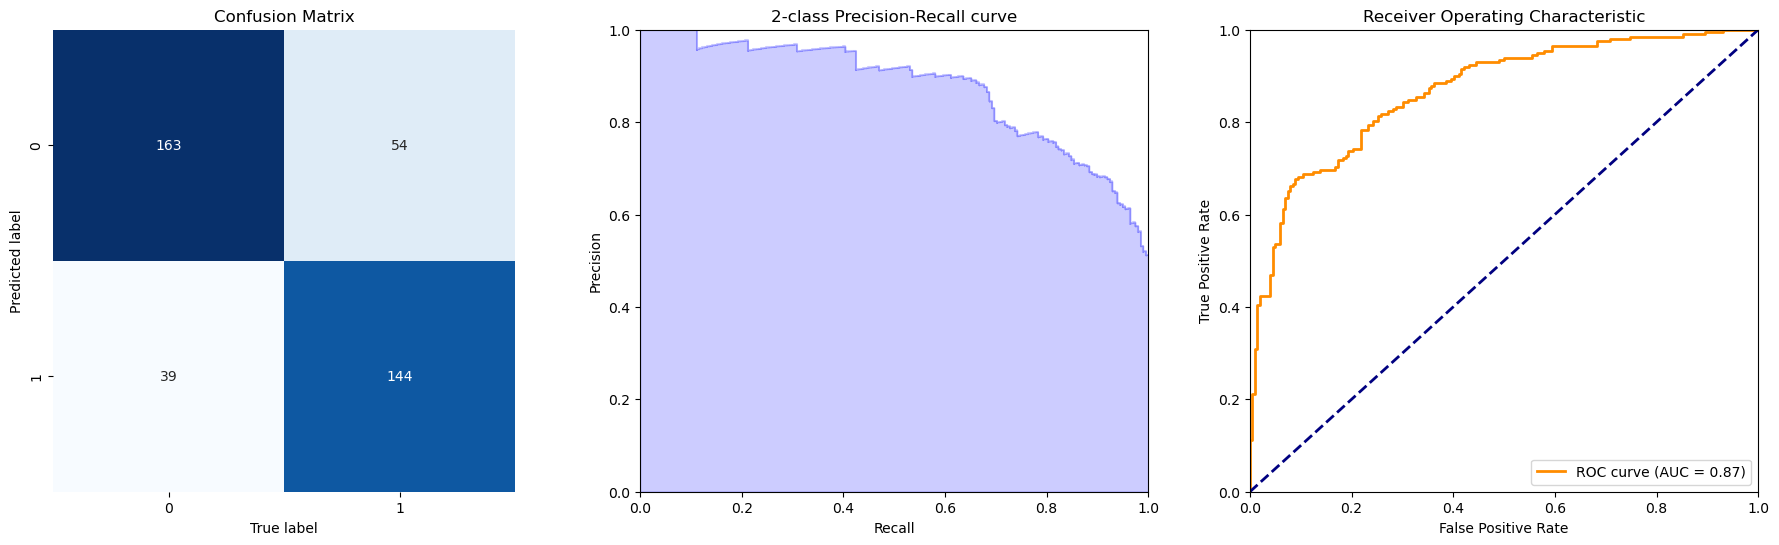

In [80]:
print("Results : TF-IDF Vectorizer with Logistic Regression")
hamming_loss = metrics.hamming_loss(y_test, predict_lg1)
print("Hamming Loss Score: ",hamming_loss)
accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test, predict_lg1, probabilities_lg1[:, 1:])

### TF-IDF Vectorizer with Random Forest

In [81]:
rf_tf = RandomForestClassifier(n_estimators = 100)
rf_tf.fit(A1.toarray(), y_train)

RandomForestClassifier()

In [82]:
predict_rf_tf= rf_tf.predict(B1.toarray())
probabilities_rf_tf = rf_tf.predict_proba(B1.toarray())

Results : TF-IDF Vectorizer with Random Forest
Hamming Loss Score:  0.23
Accuracy : 0.7700 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7760 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7525 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8584                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


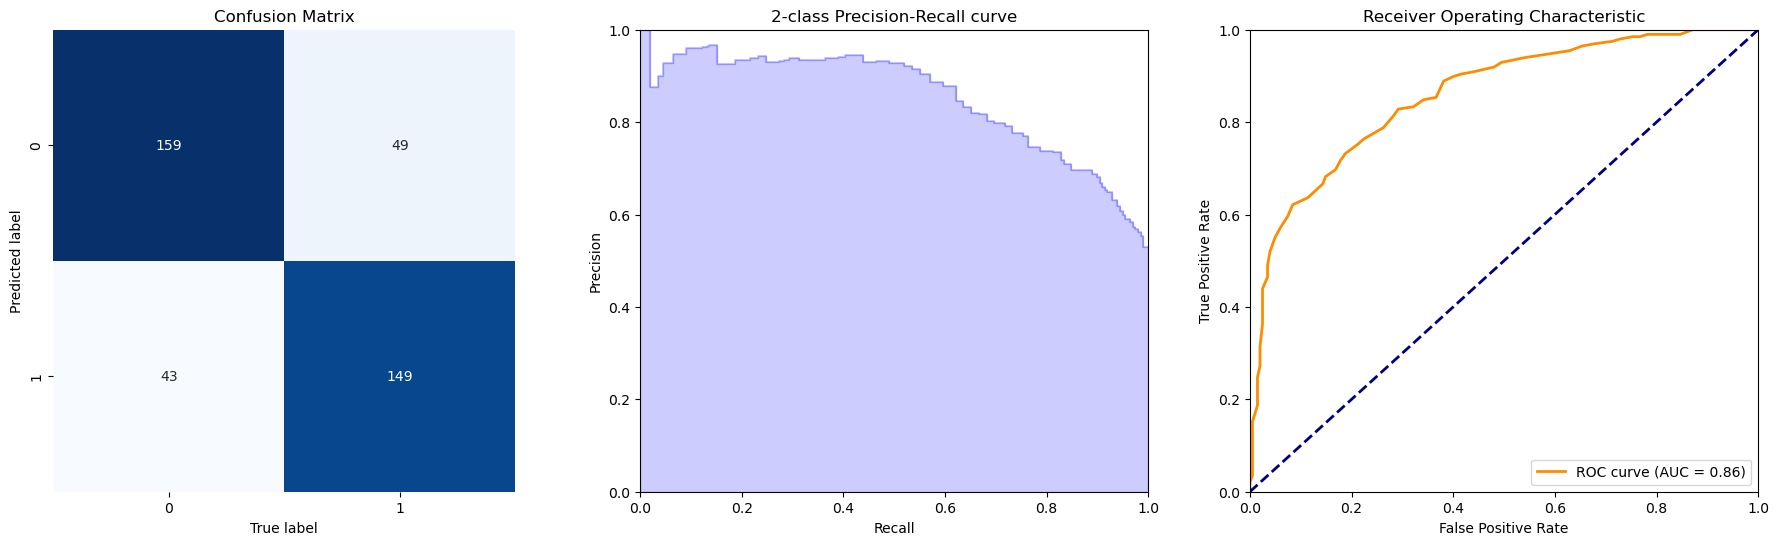

In [83]:
print("Results : TF-IDF Vectorizer with Random Forest")
hamming_loss = metrics.hamming_loss(y_test, predict_rf_tf)
print("Hamming Loss Score: ",hamming_loss)
accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test, predict_rf_tf, probabilities_rf_tf[:, 1:])

### TF-IDF Vectorizer with GradientBoostingClassifier

In [84]:
gb_tf = GradientBoostingClassifier(n_estimators=200)
gb_tf.fit(A1.toarray(), y_train)

GradientBoostingClassifier(n_estimators=200)

In [85]:
predict_gb_tf= gb_tf.predict(B1.toarray())
probabilities_gb_tf =gb_tf.predict_proba(B1.toarray())

Hamming Loss Score:  0.24
Accuracy : 0.7600 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7772 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7222 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8430                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


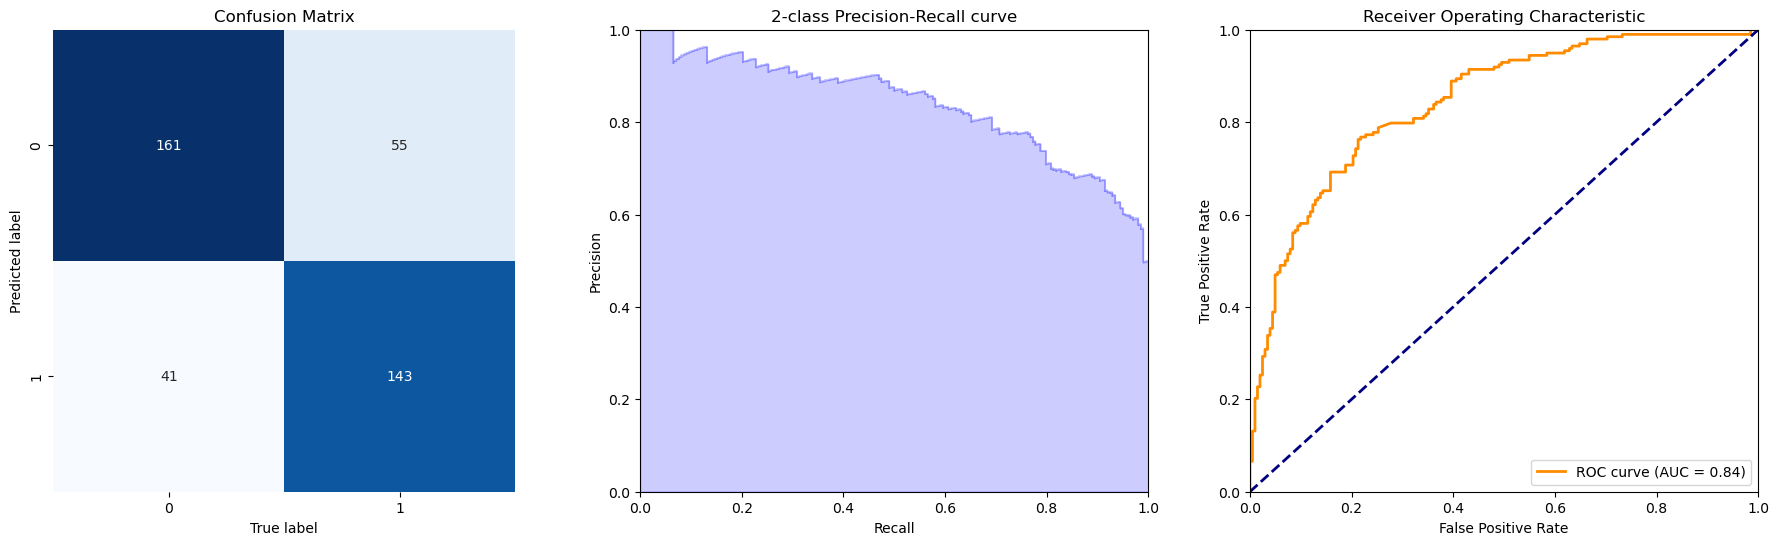

In [86]:
hamming_loss = metrics.hamming_loss(y_test, predict_gb_tf)
print("Hamming Loss Score: ",hamming_loss)
accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test, predict_gb_tf, probabilities_gb_tf[:, 1:])

# Best Results
### Count Vectorizer with GradientBoostingClassifier 
Hamming Loss Score: 0.2325 

Accuracy : 0.7675 

ROC AUC  : 0.8423


### TF-IDF Vectorizer with Random Forest 
Hamming Loss Score: 0.2275 

Accuracy : 0.7725 

ROC AUC  : 0.8665


# Summary
Tried 4 different models (2 linear, 1 bagging and 1 boosting) for two different text processing methods (Count Vectorizer and TF-IDF Vectorizer)

SVC, Logistic Regression, Random Forest and Gradient Boosting Classifier

Focused more to minimize misclassification than accuracy while evaluating the models


# Suggestion
Additional text cleaning to remove any common keywords

Feature Engineer focusing on type of words (Noun, Adjective, verb etc)

Advanced Deep Learning models to improve Accuracy and decrease misclassification


# References
https://www.business2community.com/customer-experience/the-importance-of-customer-reviews-02400628

https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews

https://www.kaggle.com/code/selinglpek/sentiment-analysis-for-amazon-reviews